In [1]:
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt

We are going to integrate the function

\begin{equation}
f(s_1, s_2) = \text{exp} \left(s_1 + s_2 \right)
\end{equation}

over $\mathcal{S} \subset [-1, 1]^2$ assuming that $\omega \left(s_1 \right)$ and $\omega \left(s_2 \right)$ are uniform distributions. The true integral is given by

\begin{equation}
\text{exp} \left(-2 \right) + \text{exp} \left(2 \right) - 2 = 5.5244
\end{equation}

In [13]:
s1 = Parameter(distribution='uniform', lower=-1., upper=1, order=10)
s2 = Parameter(distribution='uniform', lower=-1., upper=1, order=10)

In [14]:
def fun(s):
    return np.exp(s[0] + s[1])

In [15]:
mybasis = Basis('tensor-grid')
mypoly = Poly(parameters=[s1, s2], basis=mybasis, method='numerical-integration')

In [16]:
quadrature_points, quadrature_weights = mypoly.get_points_and_weights()
model_evaluations = evaluate_model(quadrature_points, fun) 
M = len(quadrature_weights)
integral = 4 * float(model_evaluations.reshape(1, M) @ quadrature_weights.reshape(M, 1) )

In [6]:
print(integral)

5.524391382167255


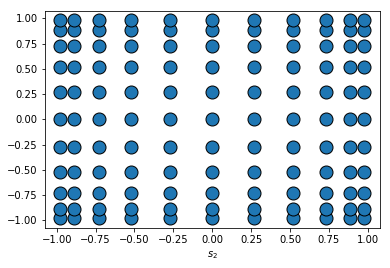

In [17]:
fig = plt.figure()
plt.plot(quadrature_points[:,0], quadrature_points[:,1], 'o', markersize=13, markeredgecolor='k')
plt.xlabel('$s_1$')
plt.xlabel('$s_2$')
plt.show()

# Sparse grids

In [25]:
mybasis = Basis('sparse-grid', level=8, growth_rule='linear')
mypoly = Poly(parameters=[s1, s2], basis=mybasis, method='numerical-integration')
quadrature_points, quadrature_weights = mypoly.get_points_and_weights()

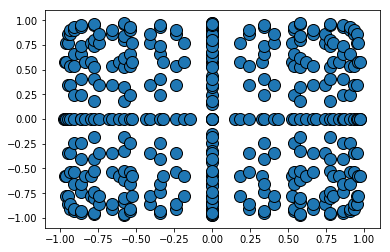

In [26]:
fig = plt.figure()
plt.plot(quadrature_points[:,0], quadrature_points[:,1], 'o', markersize=12, markeredgecolor='k')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.show()

In [11]:
model_evaluations = evaluate_model(quadrature_points, fun) 
M = len(quadrature_weights)
integral = 4 * float(model_evaluations.reshape(1, M) @ quadrature_weights.reshape(M, 1) )

In [12]:
print(integral)

5.524390376999528
